<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Tratamiento-de-outliers-o-valores-perdidos" data-toc-modified-id="Tratamiento-de-outliers-o-valores-perdidos-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Tratamiento de <em>outliers</em> o valores perdidos</a></span></li><li><span><a href="#Eliminar-outliers" data-toc-modified-id="Eliminar-outliers-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Eliminar <em>outliers</em></a></span></li><li><span><a href="#Reemplazar" data-toc-modified-id="Reemplazar-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Reemplazar</a></span></li></ul></div>

# Tratamiento de *outliers* o valores perdidos

Los *outliers* o valores perdidos son observaciones anormales en nuestros datos que puede afectar potencialmente nuestros análisis. 

> Es decir, un *outlier* es una observación dentro de nuestros datos que nos es consistente con el resto, que se escapa. 

Imaginemos que estamos midiendo el peso de las alumnas de una clase y son los siguientes:

```python
pesos = [92.31, 76.4, 87.3, 60.86, 65.96, 74.23, 87.56, 82.47, 69.27, 81.69]
```

- el peso máximo es de 92.31


- el peso mínimo es de 60.86


- la media del peso de la clase sería 77.085. 


- la distancia del máximo y del mínimo a la media es de 14.504 y 16.94 respectivamente. 

**Como vemos la media se sitúa en la mitad del intervalo y nos podría dar una muy buena estimación del peso de la clase** 


Imaginemos ahora que el peso de los 10 las alumnas son: 

```python
pesos2 = [92.31, 76.4, 117.3, 60.86, 65.96, 74.23, 87.56, 82.47, 69.27, 81.69]
```
En este caso: 

- el peso máximo es de 117.3


- el peso mínimo es de 60.86


- la media del peso de la clase sería 80.805. 


- la distancia del máximo y del mínimo a la media es de 36.49 y 19.94 respectivamente. 

**En este caso la media ya no está situada aproximadamente en la mitad del intervalo**. El efecto de la alumna que tiene un mayor perso ha hecho que la media aritmética se haya desplazado hacia el valor máximo y por lo tanto ya no es tan buena representación de como se reparten los pesos en la clase.  


Es en este caso, cuando el tratamiento de los *outliers* debe ser solucionado. Esto lo podemos hacer de distintas formas: 

- Eliminación de esos registros 


- Reemplazar por la media, mediana, moda...


- Mantenerlos (si el problema a resolver tiene que ver con outliers). 


Pero antes de ponernos a quitar datos o reemplazarlos tenemos que identificar cuales son los *outliers* en nuestro datos. 

- Lo podemos hacer visualmente usando un `boxplot`. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/california.csv", index_col = 0)
nuevas_columnas = {
    "ic2" : "num_habitaciones", 
    "ic3": "num_vecinos", 
    "ic4": "total_habitaciones", 
    "ic5": "total_baños", 
    "avggift": "dist_playa"}

df.rename(columns = nuevas_columnas, inplace = True)
df.head()

,state,gender,median_home_val,median_household_income,num_habitaciones,num_vecinos,total_habitaciones,total_baños,dist_playa
0,FL,M,1158.437751,392.0,430.0,466.0,520.0,21975.0,NaN
1,IL,M,537.000000,365.0,415.0,410.0,473.0,19387.0,5.666667
2,FL,F,725.000000,301.0,340.0,361.0,436.0,18837.0,4.111111
3,NC,M,1158.437751,401.0,407.0,399.0,413.0,14014.0,27.277778
4,FL,F,995.000000,252.0,280.0,316.0,348.0,17991.0,6.000000


los outliers solo se pueden identificar en variables numéricas -- las categóricas no puedes identificar que está dentro del patrón o no.

lo que sí que puedes ver con la categóricas es ver el número de elementos por categorías y si no son un número significativo, eliminarlos, o asumirlos ocmo otra categoría.

In [3]:
# seleccionamos solo aquellas variables numéricas

df_numericas = df.select_dtypes(include=np.number)

In [4]:
df_numericas.head(2)

,median_home_val,median_household_income,num_habitaciones,num_vecinos,total_habitaciones,total_baños,dist_playa
0,1158.437751,392.0,430.0,466.0,520.0,21975.0,NaN
1,537.000000,365.0,415.0,410.0,473.0,19387.0,5.666667


hay que identificar los outliers tanto en las variables predictoras como en la variable respuesta.

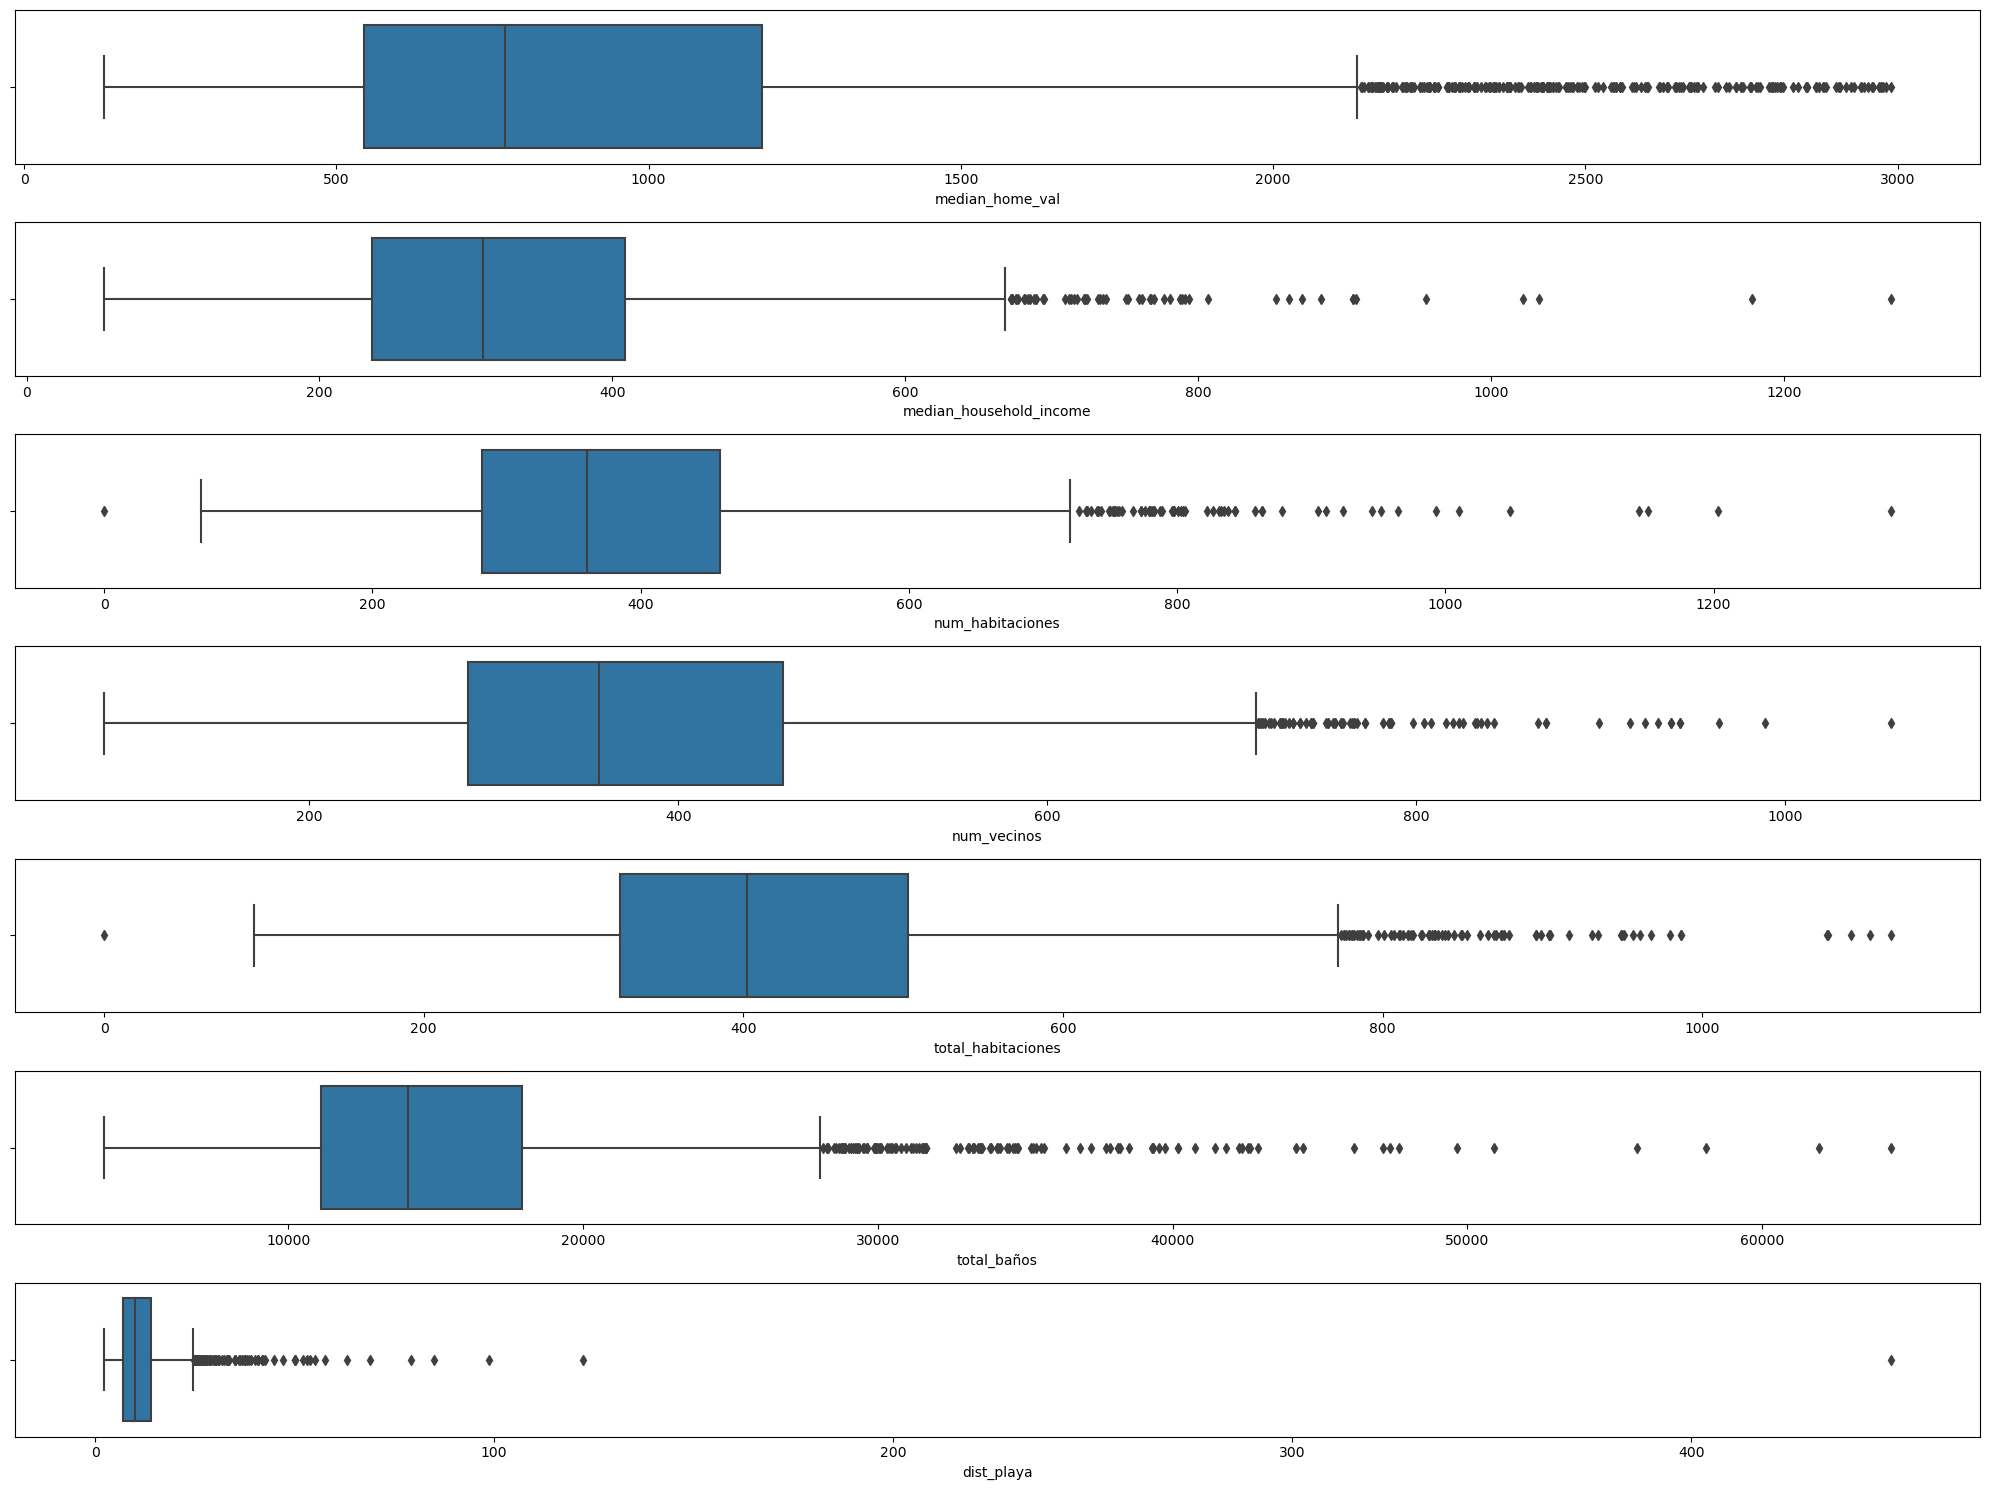

In [5]:
fig, ax = plt.subplots(7, 1, figsize=(20,15))

for i in range(len(df_numericas.columns)):
    sns.boxplot(x=df_numericas.columns[i], data=df_numericas, ax=ax[i])
plt.tight_layout()
plt.show();

el iqr es la caja

el bigote es $$q3 + 1.5 * iqr$$ o $$q1 - 1.5 * iqr $$

In [6]:
df[df['total_habitaciones'] == 0] #check lo puedes quitar

,state,gender,median_home_val,median_household_income,num_habitaciones,num_vecinos,total_habitaciones,total_baños,dist_playa
3126,AL,F,550.0,752.0,0.0,601.0,0.0,NaN,10.962963


In [7]:
df = df[df['total_habitaciones'] != 0] #esto lo mantienes
df.head(1)

,state,gender,median_home_val,median_household_income,num_habitaciones,num_vecinos,total_habitaciones,total_baños,dist_playa
0,FL,M,1158.437751,392.0,430.0,466.0,520.0,21975.0,NaN


la división del conjunto de datos se hace sobre la variable espuesta. ahora, que hago con los outliers de las variables predictoras?
- divido el set de datos?
- me cargo los outliers?

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
median_home_val,3332.0,958.860163,595.383548,128.00000,544.000000,770.0,1182.000000,2989.0
median_household_income,3234.0,333.297464,131.727277,53.00000,236.000000,312.0,409.000000,1273.0
num_habitaciones,3324.0,380.373947,136.675409,72.00000,282.000000,360.0,459.000000,1332.0
num_vecinos,3260.0,382.963804,133.481964,89.00000,286.000000,357.0,457.000000,1057.0
total_habitaciones,3299.0,426.035768,141.050249,94.00000,323.000000,402.0,503.000000,1118.0
total_baños,3000.0,15300.101000,6240.616037,3748.00000,11108.750000,14056.0,17913.000000,64360.0
dist_playa,3095.0,11.627769,10.625273,2.26087,7.064777,10.0,14.097619,450.0


Hemos identificado visualmente los *outliers* en nuestras variables numéricas, pero en realidad no sabemos que valores son los que son los *outliers*. ¿Cómo lo podríamos hacer?

Calcularemos  el rango intercuartílico (IQR) siguiendo los siguientes pasos: 

- Calcular el primer cuartil (Q1, 25%): donde el 25% de los datos son menores o iguales al valor del Q1. 


- Calcular el tercer cuartil (Q3, 75%): donde el 75% de los datos son menores o iguales al valor de Q3


- Calcular el rango intercuartil (IQR), es la diferencia entre el Q3 y Q1

```
IQR  = Q3 - Q1
```

> Todos los valors que sean **menores que `Q1 - 1.5IQR`** o **mayores que `Q3 + 1.5IQR`** serán considerados outliers. 

vamos a observar la variable `median_home_val`

In [9]:
df.head()

,state,gender,median_home_val,median_household_income,num_habitaciones,num_vecinos,total_habitaciones,total_baños,dist_playa
0,FL,M,1158.437751,392.0,430.0,466.0,520.0,21975.0,NaN
1,IL,M,537.000000,365.0,415.0,410.0,473.0,19387.0,5.666667
2,FL,F,725.000000,301.0,340.0,361.0,436.0,18837.0,4.111111
3,NC,M,1158.437751,401.0,407.0,399.0,413.0,14014.0,27.277778
4,FL,F,995.000000,252.0,280.0,316.0,348.0,17991.0,6.000000


In [10]:
# cálculo del Q1
Q1 = np.nanpercentile(df['median_home_val'], 25)
Q1

544.0

In [11]:
# cálculo del Q1
Q3 = np.nanpercentile(df['median_home_val'], 75)
Q3

1182.0

In [12]:
IQR = Q3 - Q1
IQR ##el ancho de la caja

638.0

In [13]:
outlier_step = IQR * 1.5 ## lo que e moverán los bigotes
outlier_step

957.0

estas serían las filas que están fuera de los bigotes:

In [14]:
outliers_value = df[(df['median_home_val'] < Q1 - outlier_step) | (df['median_home_val'] > Q3 + outlier_step)]
outliers_value

,state,gender,median_home_val,median_household_income,num_habitaciones,num_vecinos,total_habitaciones,total_baños,dist_playa
19,CA,F,2362.0,613.0,632.0,655.0,678.0,21179.0,8.928571
29,CA,F,2143.0,280.0,353.0,328.0,373.0,12935.0,9.260870
47,CA,F,2377.0,NaN,637.0,652.0,663.0,19545.0,9.111111
58,AZ,M,2158.0,411.0,516.0,535.0,640.0,33235.0,7.933333
65,CA,M,2357.0,511.0,540.0,570.0,609.0,23786.0,13.666667
...,...,...,...,...,...,...,...,...,...
3313,CA,M,2264.0,453.0,503.0,NaN,537.0,17928.0,9.714286
3315,CA,F,2387.0,394.0,399.0,446.0,447.0,17331.0,8.045455
3317,CA,F,2473.0,585.0,586.0,610.0,611.0,21343.0,25.843750
3330,CA,F,2707.0,507.0,504.0,538.0,537.0,16165.0,12.117647


In [15]:
outliers_value['state'].value_counts() ## gran parte de las filas son de CA

CA    193
IL      7
NC      4
FL      4
TX      4
MO      3
GA      3
WA      3
MI      2
SC      2
NV      2
AZ      1
CO      1
NE      1
AL      1
AR      1
KS      1
Name: state, dtype: int64

In [16]:
df['state'].value_counts()

CA    604
FL    319
TX    270
IL    224
MI    215
NC    158
WA    143
GA    110
OR    107
WI    102
MO    101
IN    100
AZ     84
CO     81
SC     76
MN     70
KY     63
AR     56
AL     55
OK     54
TN     50
LA     50
KS     46
NV     45
IA     43
NM     42
NE     32
MS     32
Name: state, dtype: int64

podemos probar con separar `ca` del resto de estados:

In [17]:
df_california = df[df['state'] == 'CA']
df_eeuu = df[df['state'] != 'CA']

trabajaremos con los datos de `CA`.

In [18]:
df_cali_numericas = df_california.select_dtypes(include=np.number)

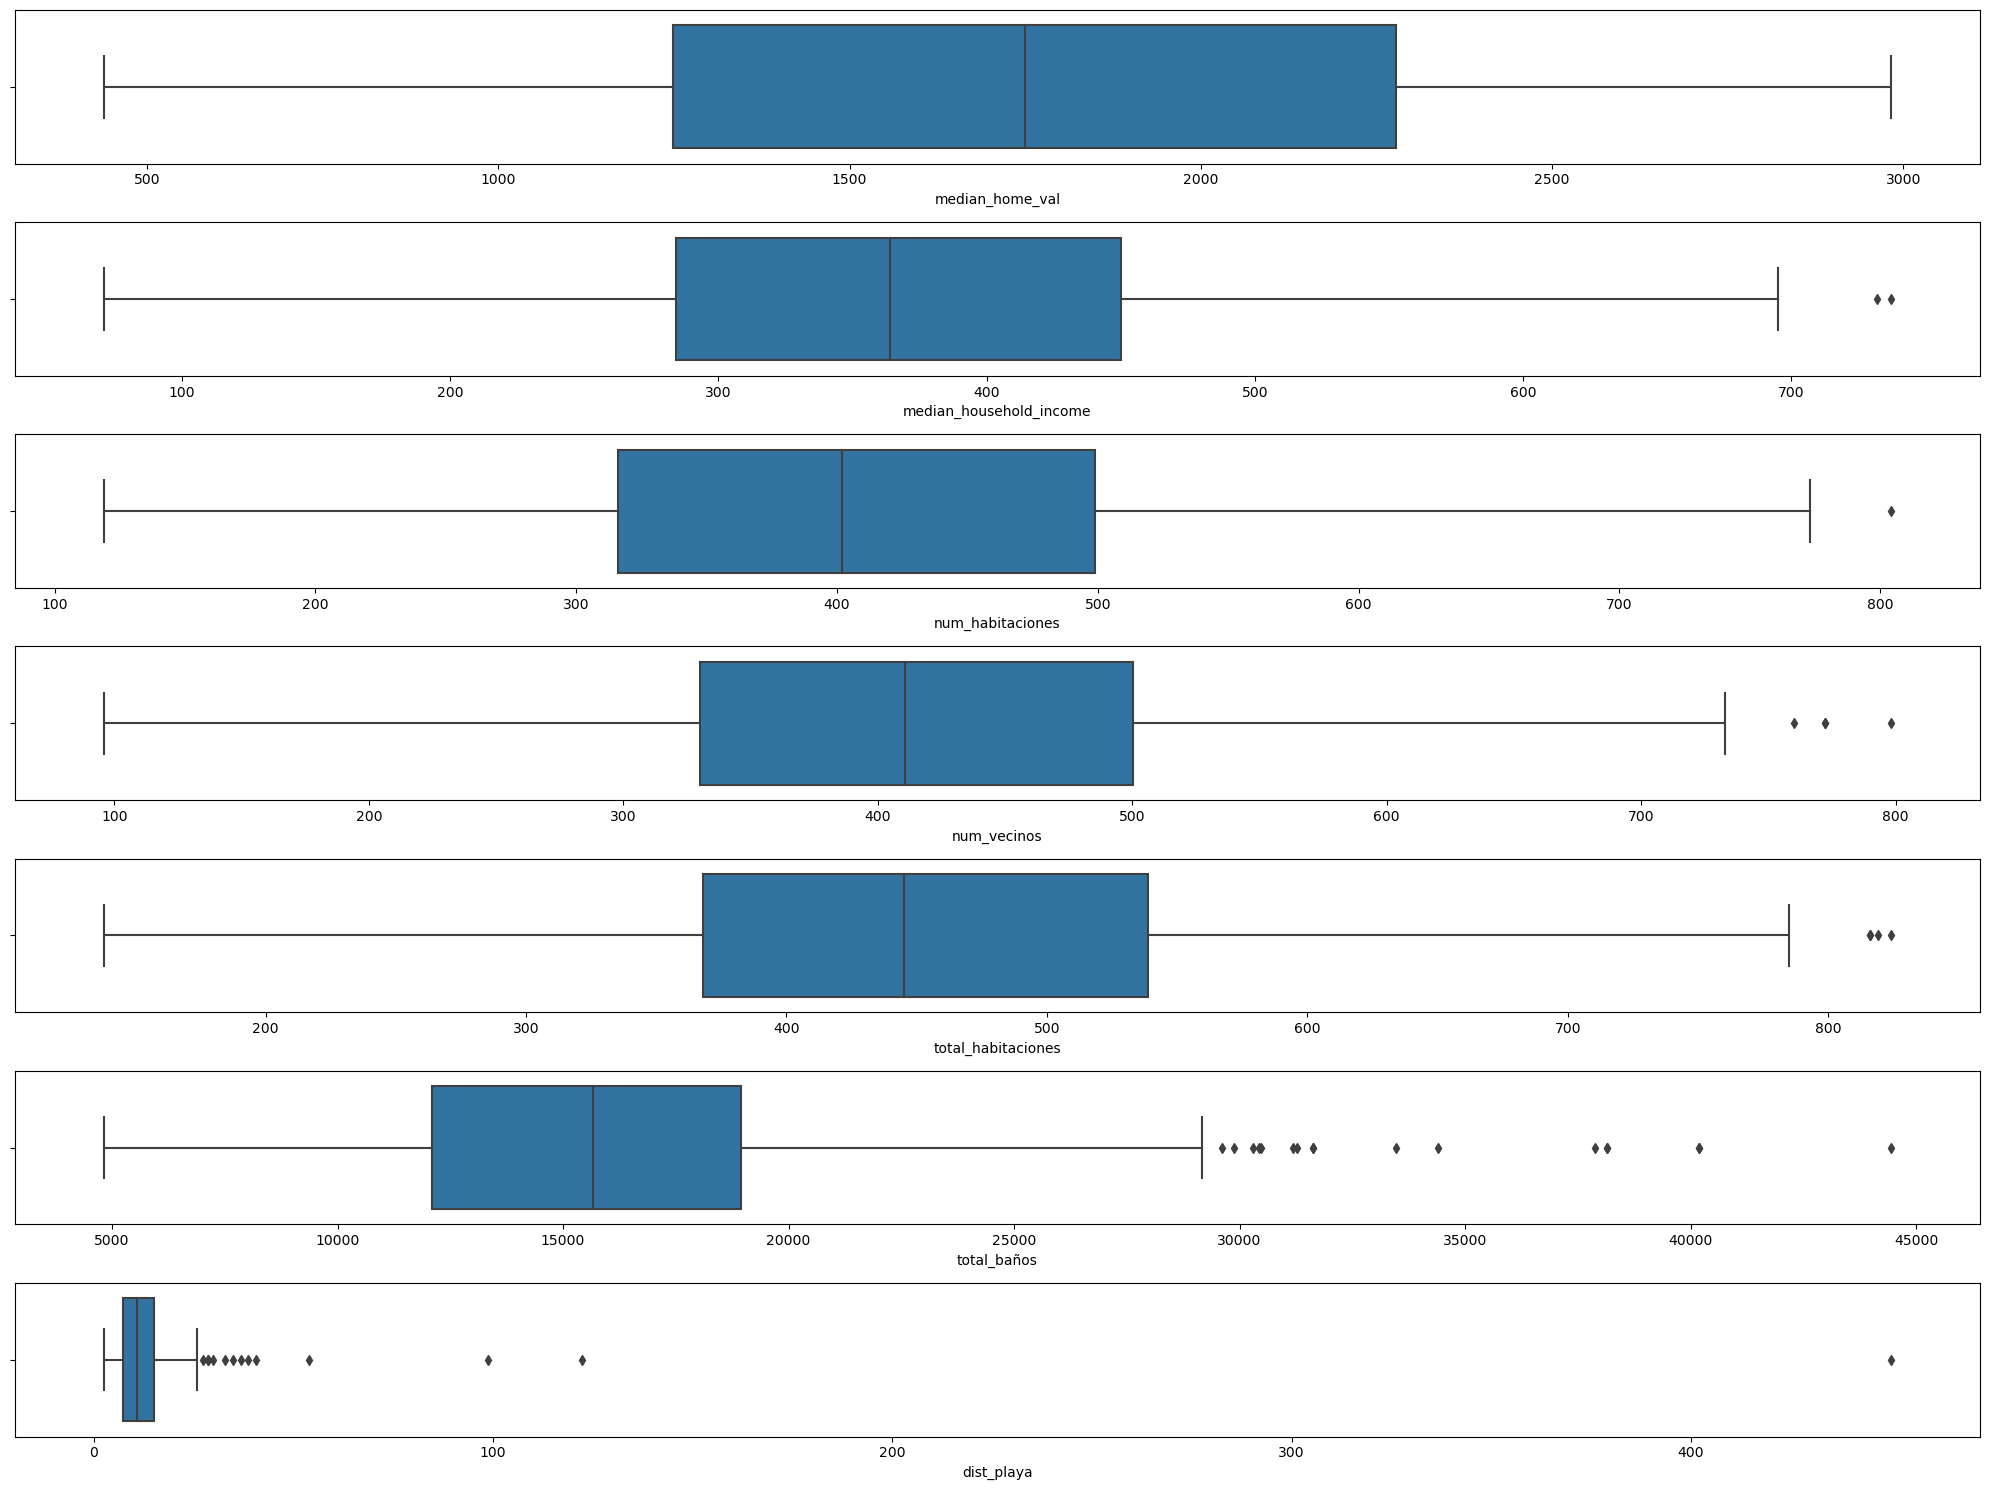

In [19]:
fig, ax = plt.subplots(7, 1, figsize=(20,15))

for i in range(len(df_cali_numericas.columns)):
    sns.boxplot(x=df_cali_numericas.columns[i], data=df_cali_numericas, ax=ax[i])
plt.tight_layout()
plt.show();

observando los datos de `CA`, salvo un par de excepciones, se acaban bastante los outliers.

In [20]:
def detectar_outliers(lista_columnas, dataframe):

    dict_indices = {}

    for i in lista_columnas:
        Q1 = np.nanpercentile(dataframe[i], 25)
        Q3 = np.nanpercentile(dataframe[i], 75)

        IQR = Q3 - Q1

        outlier_step = IQR * 1.5

        outliers_value = dataframe[(dataframe[i] < Q1 - outlier_step) | (dataframe[i] > Q3 + outlier_step)]

        if outliers_value.shape[0] > 0:
            dict_indices[i] = outliers_value.index.tolist()
        else:
            #dict_indices[i] = 'sin outliers'
            pass
    return dict_indices

In [21]:
df_cali_numericas.head(1)

,median_home_val,median_household_income,num_habitaciones,num_vecinos,total_habitaciones,total_baños,dist_playa
6,1026.0,459.0,470.0,491.0,496.0,13803.0,11.25


In [22]:
dic_outliers = detectar_outliers(df_cali_numericas.columns, df_california)

In [23]:
print(dic_outliers)

{'median_household_income': [3052, 3296], 'num_habitaciones': [1911], 'num_vecinos': [2974, 3052, 3279, 3296], 'total_habitaciones': [1911, 2974, 3052, 3279], 'total_baños': [168, 289, 550, 572, 1343, 1453, 1733, 2389, 2514, 2518, 2597, 2869, 2974, 3035, 3171, 3206, 3279], 'dist_playa': [290, 550, 1026, 1371, 1957, 1976, 1993, 2253, 2410, 2560, 3035, 3052, 3174]}


In [24]:
df_cali_del = df_california.copy()
df_cali_del.head(1)

,state,gender,median_home_val,median_household_income,num_habitaciones,num_vecinos,total_habitaciones,total_baños,dist_playa
6,CA,F,1026.0,459.0,470.0,491.0,496.0,13803.0,11.25


In [25]:
indices = list(dic_outliers.values())
indices = [num for lista in indices for num in lista]
print(indices)

[3052, 3296, 1911, 2974, 3052, 3279, 3296, 1911, 2974, 3052, 3279, 168, 289, 550, 572, 1343, 1453, 1733, 2389, 2514, 2518, 2597, 2869, 2974, 3035, 3171, 3206, 3279, 290, 550, 1026, 1371, 1957, 1976, 1993, 2253, 2410, 2560, 3035, 3052, 3174]


In [26]:
df_cali_del.drop(indices, axis = 0, inplace=True)
df_cali_del.head()

,state,gender,median_home_val,median_household_income,num_habitaciones,num_vecinos,total_habitaciones,total_baños,dist_playa
6,CA,F,1026.0,459.0,470.0,491.0,496.0,13803.0,11.250000
12,CA,M,1538.0,271.0,317.0,342.0,393.0,15627.0,5.500000
16,CA,F,596.0,164.0,168.0,181.0,190.0,5273.0,16.500000
19,CA,F,2362.0,613.0,632.0,655.0,678.0,21179.0,8.928571
20,CA,F,2089.0,275.0,296.0,322.0,356.0,10484.0,7.125000


In [27]:
df_cali_del.reset_index(inplace=True, drop=True)
df_cali_del.head(1)

,state,gender,median_home_val,median_household_income,num_habitaciones,num_vecinos,total_habitaciones,total_baños,dist_playa
0,CA,F,1026.0,459.0,470.0,491.0,496.0,13803.0,11.25


voy a reemplazar los valores

In [28]:
df_california.head(1)

,state,gender,median_home_val,median_household_income,num_habitaciones,num_vecinos,total_habitaciones,total_baños,dist_playa
6,CA,F,1026.0,459.0,470.0,491.0,496.0,13803.0,11.25


In [30]:
print(dic_outliers)

{'median_household_income': [3052, 3296], 'num_habitaciones': [1911], 'num_vecinos': [2974, 3052, 3279, 3296], 'total_habitaciones': [1911, 2974, 3052, 3279], 'total_baños': [168, 289, 550, 572, 1343, 1453, 1733, 2389, 2514, 2518, 2597, 2869, 2974, 3035, 3171, 3206, 3279], 'dist_playa': [290, 550, 1026, 1371, 1957, 1976, 1993, 2253, 2410, 2560, 3035, 3052, 3174]}


In [32]:
df_california.describe().T

,count,mean,std,min,25%,50%,75%,max
median_home_val,604.0,1756.640522,644.705504,439.000000,1248.000000,1750.000000,2278.25,2982.0
median_household_income,579.0,372.221071,126.578939,71.000000,284.000000,364.000000,450.00,737.0
num_habitaciones,601.0,410.021631,130.287341,119.000000,316.000000,402.000000,499.00,804.0
num_vecinos,596.0,421.877517,126.052357,96.000000,330.000000,410.500000,500.25,798.0
total_habitaciones,593.0,456.306914,130.999073,138.000000,368.000000,445.000000,539.00,824.0
total_baños,533.0,16086.110694,5874.524203,4825.000000,12089.000000,15654.000000,18951.00,44438.0
dist_playa,555.0,13.175912,20.508053,2.637931,7.442308,10.833333,15.00,450.0


puedes elegir si mantienes los datos o los reemplazas. aquí el caso para reemplazarlos:

In [35]:
for k, v in dic_outliers.items():
    if k == 'median_home_val':
        media = df_california[k].mean()

        for indice in v:
            df_california.loc[indice, k] = media
    else: 
        mediana = df_california[k].median()

        for indice in v:
            df_california.loc[indice, k] = mediana

In [36]:
df_california.describe().T

,count,mean,std,min,25%,50%,75%,max
median_home_val,604.0,1756.640522,644.705504,439.000000,1248.000000,1750.000000,2278.250000,2982.00000
median_household_income,579.0,370.941278,124.766425,71.000000,284.000000,364.000000,445.500000,695.00000
num_habitaciones,601.0,409.352745,129.289412,119.000000,316.000000,402.000000,499.000000,773.00000
num_vecinos,596.0,419.427852,122.646221,96.000000,330.000000,410.250000,493.750000,733.00000
total_habitaciones,593.0,453.785835,127.544427,138.000000,368.000000,445.000000,537.000000,785.00000
total_baños,533.0,15491.144465,4787.632274,4825.000000,12089.000000,15654.000000,18525.000000,29170.00000
dist_playa,555.0,11.584955,5.405146,2.637931,7.442308,10.833333,14.333333,25.84375


**Empecemos con la variable `num_vecinos`**

Para calcular los cuartiles recurriremos a la librería NumPy donde encontratemos los siguientes métodos: 

- `np.percentile`: lo usaremos cuando **no** tengamos **nan** entre nuestros valores. 


- `np.nanpercentile`: lo usaremos cuando tengamos nan entre nuestros valores. 

En ambos casos tendremos que pasarle: 

- La columna sobre la que queramos calcular los cuartiles 


- El cuartil que queremos calcular. 

In [ ]:
df.head()

In [ ]:
# cálculo del Q1
Q1 = np.nanpercentile(df['num_vecinos'], 25)
Q1

In [ ]:
# cálculo del Q3
Q3 = np.nanpercentile(df['num_vecinos'], 75)
Q3

In [ ]:
#calculemos el IQR 

IQR = Q3 - Q1
IQR

In [ ]:
# multiplicamos el IQR por 1.5

outlier_step = 1.5 * IQR
outlier_step

Ahora es el momento de filtrar nuestros datos filtrar/eliminar aquellos datos que sean *outliers*, es decir, vamos a crearnos un *dataframe* con los datos que cumplan dos condiciones: 

- Que sean menor que el valor de Q1 - outlier_step


- Que sean mayores que el valor de Q3 + outlier_step

In [ ]:
outliers_data = df[(df["num_vecinos"] < Q1 - outlier_step) | (df["num_vecinos"] > Q3 + outlier_step)]

In [ ]:
outliers_data

In [ ]:
# sacamos los índices de los outliers, para saber que filas son las que tienen los outliers
x = list(outliers_data.index)
x 

Pero esto es un poco rollo si tuvieramos que ejecutar todas estas líneas para cada columna numérica, por lo que vamos a crearnos una función: 

In [ ]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices 

In [ ]:
lista_columnas = df_numericas.columns
lista_columnas

In [ ]:
# aplicamos la función y sacamos los índices de los outliers.

ind = detectar_outliers(lista_columnas, df)
print(ind)

Ahora ya podremos hacer el tratamiento correcto de los *outliers*, como comentabamos un poco más arriba: 

- Eliminarlos

- Reemplazarlos

- Mantenerlos. 

# Eliminar *outliers* 

En este caso solo vamos a necesitar los índices. Por lo que necesitamos acceder a los valores de nuestro diccionario, para luego usarlos para elminarlos. 

In [ ]:
# sacamos los valores de nuestro diccionario. 

valores = list(ind.values())

In [ ]:
# pero ojo!! Esto es una lista de listas, por lo que necesitaremos aplanarla, ya que el método drop acepta listas.

print(valores)

In [ ]:
# hacemos una list comprehension para aplanar nuestra lista de listas

valores = [indice for sublista in valores for indice in sublista]
print(valores)

In [ ]:
valores = set(valores)

In [ ]:
print(valores)

In [ ]:
df.shape

In [ ]:
# nos hacems¡os una copia del dataframe original

df_sin_outliers2 = df.copy()

In [ ]:
# eliminamos usando la lista de índices las filas que hemos identificado como outliers. 

final = df_sin_outliers2.drop(df_sin_outliers2.index[list(valores)] )

Por último chequeamos las filas del *dataframe* nuevo y comprobamos si se han borrado los registros que queríamos. 

In [ ]:
final.shape

# Reemplazar

También podemos reemplazar los valores de los *outliers* por la media o la mediana. Recordamos que la función para detectar los *outliers* nos devolvía un diccionario, donde las *keys* eran el nombre de las columnas y los *values* la lista de los índices donde tenemos nulos. 

In [ ]:
print(ind)

In [ ]:
# lo que vamos a hacer es iterar por el diccionario que nos devuelve la función 
for k, v in ind.items():
    if k == "bmi":
        media = df[k].mean() # calculamos la media para cada una de las columnas que tenemos en nuestro diccionario
        for i in v: # iteremos por la lista de valores para cada columna
            df.loc[i,k] = media # usando el loc, reemmplazamos los valores de los outliers por la media que hemos calculado al inicio.  
    else: 
        mediana = df[k].median() # calculamos la media para cada una de las columnas que tenemos en nuestro diccionario
        for i in v: # iteremos por la lista de valores para cada columna
            df.loc[i,k] = mediana 
        

In [ ]:
df_numericas2 = df.select_dtypes(include = np.number)

In [ ]:
fig, ax = plt.subplots(7, 1, figsize=(20,15))

for i in range(len(df_numericas2.columns)):
    sns.boxplot(x=df_numericas2.columns[i], data=df_numericas2, ax=ax[i])
plt.show()

In [ ]:
# guardamos el csv con los valores cambiados

df.to_csv("insurance_sin_outliers.csv")